In [1]:
# TODO: explain how to run this, and that they only need the gist (loads tools)

# wranglign ---------
import pandas as pd
from siuba import *

# plotting ----------
from plotnine import *

theme_set(theme_classic(base_family = "Noto Sans CJK JP"))

# data --------------
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/music200.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/music200.csv"
music_top200 = pd.read_csv(fname)

# tracks
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/track_features.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/track_features.csv"
track_features = pd.read_csv(fname)

# student support ----------
from siuba import pipe
from IPython.display import HTML, display
from siututor import Blank
___ = Blank()

# DataFrame display --------
pd.set_option("display.max_rows", 6)

from IPython import get_ipython
# special ipython function to get the html formatter
html_formatter = get_ipython().display_formatter.formatters['text/html']

# here, we avoid the default df._repr_html_ method, since it inlines css
# (style tags make vue angry)
html_formatter.for_type(
    pd.DataFrame,
    lambda df: df.to_html(max_rows = pd.get_option("display.max_rows"), show_dimensions = True)
)

# remove the <ggplot: (528...)> printout
html_formatter.for_type(ggplot, lambda g: "")


### Exercise 1:

The options below let you change different arguments to `geom_text()`. Try changing them and running the code, in order to get a readable plot. Then, answer the questions underneath the plot.

### Exercise 2:

This exercise is a case study on selecting extreme differences between two features, such as energy and acousticness.

At the end of the case study, you'll be prompted to add code!

Generally tracks with higher energy tend to be less acoustic, as shown in the plot below.

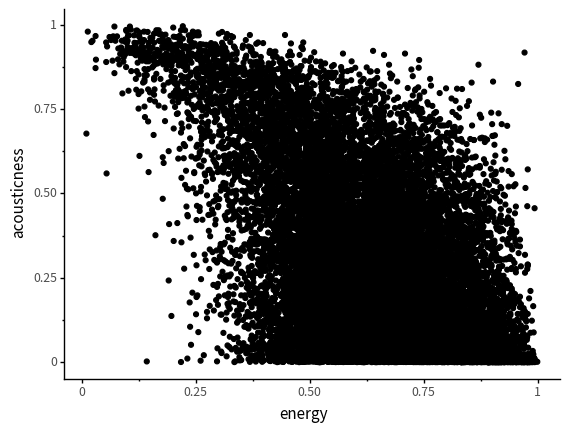

<ggplot: (-9223372036569371525)>

In [2]:
(track_features
  >> filter(_.popularity > 33)
  >> ggplot(aes("energy", "acousticness"))
   + geom_point()
)

But notice that in the plot above, there's a point in the top right, that is high energy and high acousticness.

In order to find high energy and acousticness songs like this, I used the following code.

In [3]:
(track_features
  >> filter(_.energy > .9, _.popularity > 33)
  >> arrange(-_.acousticness)
)

,artist,album,track_name,energy,valence,danceability,speechiness,acousticness,popularity,duration
23990,MC Kevin o Chris,Vamos pra Gaiola,Vamos pra Gaiola,0.971,0.521,0.872,0.2810,0.917000,61,161.600
5211,ScHoolboy Q,CrasH Talk,Black Folk,0.902,0.400,0.734,0.3960,0.831000,51,147.040
24929,MC Kevin o Chris,Eu Vou pro Baile da Gaiola,Eu Vou pro Baile da Gaiola,0.957,0.642,0.832,0.1050,0.824000,52,123.220
...,...,...,...,...,...,...,...,...,...,...
18951,Foo Fighters,There Is Nothing Left To Lose,Learn to Fly,0.919,0.537,0.465,0.0408,0.000018,74,235.293
20425,Foo Fighters,One By One (Expanded Edition),Times Like These,0.908,0.265,0.377,0.0899,0.000014,68,265.560
21871,Turmion Kätilöt,Global Warning,Jumalauta,0.939,0.549,0.454,0.0618,0.000010,42,210.107


Can you plot songs by MC Kevin o Chris, with both points and text?

In [4]:
(track_features
  >> filter(_.artist == "MC Kevin o Chris")
  >> ___
)

⚠️: <b>Don't forget to replace all the blanks!</b>

Why do you think Vamos pra Gaiola is high energy and high acousticness?

<iframe width="200" src="https://www.youtube.com/embed/0R6zBcV9JiY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<details><summary>answer</summary>
My best guess is because the drums are done by a persons voice, there are few instruments, but it is still a pretty fast tempo. It would be interesting to look at their other tracks for a comparison.
</details>

Can you modify each code block in the case study to be about high energy and low danceability songs?